In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
from sklearn.metrics import r2_score
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Reading the data
dataset = pd.read_csv(r'E:\wenqu\zonal_statistics\combined_update1.csv')
# Remove rows with NaN values
dataset = dataset.dropna(axis=0)

# Now 'dataset_without_nan' contains the dataset with rows containing NaN values removed.

dataset.head()

,la_ymax,la_std_value,sla_ymax_value,sla_std_mean_value,d13c_ymax_value,d13c_std_value,d15n_ymax_value,d15n_std_value,ldmc_ymax_value,ldmc_std_value,...,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
0,1.138349,2.851361,4.515089,0.534770,-28.100536,2.812606,0.870116,5.093642,-1.235871,0.756113,...,-205.0,93.0,-0.001099,41.0,139.0,61.0,54.000000,448.000000,2851.000000,1063.000000
1,0.855036,2.900618,4.462237,0.539418,-28.148775,2.863813,1.521652,5.082226,-1.314599,0.810716,...,-196.0,101.0,-0.001099,40.0,136.0,59.0,53.666667,451.333333,2821.333333,1085.333333
2,1.062939,2.792950,4.468578,0.473788,-29.094899,2.764642,0.063880,4.382208,-0.699813,0.799816,...,-196.0,101.0,-0.001099,40.0,136.0,59.0,53.000000,450.000000,2908.000000,1148.000000
3,-0.109422,2.755855,4.463972,0.481723,-29.055893,2.374191,-0.979734,4.523654,-0.948795,0.915393,...,-203.0,93.0,-0.001096,41.0,139.0,61.0,53.000000,450.000000,2840.000000,1128.000000
4,3.991212,3.187670,4.778846,0.627437,-28.741293,2.802890,-6.886267,5.133915,0.399368,1.177771,...,-207.5,91.0,-0.001099,41.0,139.5,61.0,52.250000,448.500000,2920.500000,1133.250000


In [3]:
dataset

,la_ymax,la_std_value,sla_ymax_value,sla_std_mean_value,d13c_ymax_value,d13c_std_value,d15n_ymax_value,d15n_std_value,ldmc_ymax_value,ldmc_std_value,...,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
0,1.138349,2.851361,4.515089,0.534770,-28.100536,2.812606,0.870116,5.093642,-1.235871,0.756113,...,-205.0,93.000000,-0.001099,41.0,139.0,61.0,54.000000,448.000000,2851.000000,1063.000000
1,0.855036,2.900618,4.462237,0.539418,-28.148775,2.863813,1.521652,5.082226,-1.314599,0.810716,...,-196.0,101.000000,-0.001099,40.0,136.0,59.0,53.666667,451.333333,2821.333333,1085.333333
2,1.062939,2.792950,4.468578,0.473788,-29.094899,2.764642,0.063880,4.382208,-0.699813,0.799816,...,-196.0,101.000000,-0.001099,40.0,136.0,59.0,53.000000,450.000000,2908.000000,1148.000000
3,-0.109422,2.755855,4.463972,0.481723,-29.055893,2.374191,-0.979734,4.523654,-0.948795,0.915393,...,-203.0,93.000000,-0.001096,41.0,139.0,61.0,53.000000,450.000000,2840.000000,1128.000000
4,3.991212,3.187670,4.778846,0.627437,-28.741293,2.802890,-6.886267,5.133915,0.399368,1.177771,...,-207.5,91.000000,-0.001099,41.0,139.5,61.0,52.250000,448.500000,2920.500000,1133.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17752,2.036691,2.775138,4.592824,0.547331,-29.161771,2.583509,-5.242683,4.583639,0.584584,1.047951,...,-233.0,64.333333,-0.000957,21.0,79.0,65.0,66.000000,399.000000,2387.000000,995.111111
17753,2.347136,2.473298,4.623554,0.455511,-29.607767,2.239744,-5.776081,3.838518,0.581496,1.046283,...,-233.0,64.000000,-0.000955,21.0,79.0,65.0,75.000000,448.923077,2686.153846,1103.307692
17754,2.450821,1.877383,4.592195,0.372390,-28.078510,1.926608,-3.484088,3.896446,-0.059975,0.753404,...,-233.0,64.000000,-0.000953,21.0,79.0,65.0,74.400000,450.000000,2702.000000,1124.800000
17755,2.059386,2.757962,4.585142,0.557053,-29.249625,2.560825,-5.374062,4.570188,0.657085,1.101387,...,-233.0,64.500000,-0.000957,21.0,79.0,65.0,74.666667,448.833333,2680.000000,1115.166667


In [4]:
X = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value'], axis=1) # Features
y_la_max = dataset['d13c_ymax_value']

In [5]:
X.corr()

,snow_value,slope_value,RAD_value,SWI_value,TWI_value,AET_value,annual_diurnal_temp_value,annual_mean_temp_value,annual_precp_value,defict_value,...,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
snow_value,1.000000,-0.405338,0.095885,-0.720110,-0.152264,0.322170,-0.718540,-0.624010,-0.797347,-0.364394,...,-0.659881,-0.726255,0.462667,-0.800609,-0.783263,0.657550,0.440296,-0.108383,-0.048990,0.136871
slope_value,-0.405338,1.000000,-0.214241,0.281038,0.117550,-0.339721,0.511556,0.157145,0.531823,0.067943,...,0.288432,0.251204,-0.164262,0.510392,0.581127,-0.195956,-0.329930,0.119634,-0.117180,-0.131233
RAD_value,0.095885,-0.214241,1.000000,-0.093201,0.041113,0.018544,-0.053605,-0.081615,-0.106018,-0.086929,...,-0.084434,-0.071127,0.031010,-0.101882,-0.110087,0.033225,0.063544,-0.010359,0.051335,0.076712
SWI_value,-0.720110,0.281038,-0.093201,1.000000,0.074010,-0.068829,0.522294,0.970369,0.871638,0.624782,...,0.906040,0.934118,-0.732552,0.888534,0.803348,-0.874004,-0.477342,0.094157,-0.145442,-0.346138
TWI_value,-0.152264,0.117550,0.041113,0.074010,1.000000,-0.207794,0.238293,0.016272,0.201970,0.006702,...,0.113640,0.092481,-0.068330,0.193672,0.224358,-0.073547,-0.161193,0.055865,0.194381,0.080142
AET_value,0.322170,-0.339721,0.018544,-0.068829,-0.207794,1.000000,-0.689584,0.105285,-0.433982,0.007288,...,-0.129508,-0.136149,-0.064544,-0.407557,-0.511376,0.050606,0.300864,-0.047297,-0.299867,-0.110330
annual_diurnal_temp_value,-0.718540,0.511556,-0.053605,0.522294,0.238293,-0.689584,1.000000,0.350654,0.791115,0.124964,...,0.517836,0.605656,-0.207870,0.775035,0.826591,-0.517537,-0.503302,0.090674,0.203175,-0.070744
annual_mean_temp_value,-0.624010,0.157145,-0.081615,0.970369,0.016272,0.105285,0.350654,1.000000,0.752178,0.647192,...,0.866871,0.903811,-0.750001,0.777143,0.661665,-0.868709,-0.398266,0.071962,-0.204561,-0.360116
annual_precp_value,-0.797347,0.531823,-0.106018,0.871638,0.201970,-0.433982,0.791115,0.752178,1.000000,0.472301,...,0.850416,0.831304,-0.621809,0.997800,0.991443,-0.749070,-0.593329,0.126024,-0.006244,-0.255044
defict_value,-0.364394,0.067943,-0.086929,0.624782,0.006702,0.007288,0.124964,0.647192,0.472301,1.000000,...,0.570469,0.574683,-0.612553,0.492832,0.411550,-0.522193,-0.238133,0.060165,-0.129302,-0.218115


In [6]:
dataset.corr()

,la_ymax,la_std_value,sla_ymax_value,sla_std_mean_value,d13c_ymax_value,d13c_std_value,d15n_ymax_value,d15n_std_value,ldmc_ymax_value,ldmc_std_value,...,mean_temp_driest_quarter_value,mean_temp_wettest_quarter_value,PET_value,precp_coldest_value,precp_warmest_value,precp_seasonality_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
la_ymax,1.000000,-0.188212,0.687151,-0.122141,0.010764,-0.364541,-0.758495,-0.222862,0.583029,0.415904,...,0.133728,0.139498,-0.127563,0.107150,0.082046,-0.127252,-0.038352,-0.008270,0.048489,0.009971
la_std_value,-0.188212,1.000000,-0.058775,0.702377,-0.070095,0.638101,0.193071,0.740139,-0.237949,0.096064,...,0.101934,0.167869,-0.009739,0.142198,0.162282,-0.074947,-0.084309,0.012789,0.060079,-0.044786
sla_ymax_value,0.687151,-0.058775,1.000000,-0.220621,-0.052707,-0.046226,-0.650168,-0.317452,0.480143,0.132104,...,0.109101,0.134018,-0.124780,0.023870,-0.021896,-0.126192,0.061753,0.023461,-0.003679,0.001452
sla_std_mean_value,-0.122141,0.702377,-0.220621,1.000000,-0.156773,0.559246,-0.041299,0.700282,0.140745,0.365060,...,-0.133308,-0.097110,0.129842,-0.094711,-0.057581,0.144321,0.078899,0.031879,0.151646,0.131947
d13c_ymax_value,0.010764,-0.070095,-0.052707,-0.156773,1.000000,-0.052028,0.406012,0.231731,-0.455457,-0.608358,...,0.192669,0.183125,-0.158442,0.224650,0.208640,-0.226321,-0.230005,-0.053956,-0.122855,-0.166987
d13c_std_value,-0.364541,0.638101,-0.046226,0.559246,-0.052028,1.000000,0.323405,0.452101,-0.296761,0.006600,...,-0.071018,-0.028447,0.098071,-0.110349,-0.110519,0.052184,0.120782,0.030292,-0.043825,-0.040626
d15n_ymax_value,-0.758495,0.193071,-0.650168,-0.041299,0.406012,0.323405,1.000000,0.304384,-0.872621,-0.611398,...,0.067727,0.040251,-0.003019,0.129141,0.148292,-0.066894,-0.150499,-0.014344,-0.109544,-0.146857
d15n_std_value,-0.222862,0.740139,-0.317452,0.700282,0.231731,0.452101,0.304384,1.000000,-0.306036,-0.006726,...,0.088448,0.113439,-0.061323,0.172240,0.203653,-0.083273,-0.162277,-0.001253,0.068556,-0.008774
ldmc_ymax_value,0.583029,-0.237949,0.480143,0.140745,-0.455457,-0.296761,-0.872621,-0.306036,1.000000,0.532878,...,-0.210705,-0.193949,0.052049,-0.284101,-0.296233,0.193815,0.244410,0.028938,0.137269,0.236622
ldmc_std_value,0.415904,0.096064,0.132104,0.365060,-0.608358,0.006600,-0.611398,-0.006726,0.532878,1.000000,...,-0.101106,-0.096762,0.074649,-0.123898,-0.112555,0.143548,0.139492,0.017968,0.097867,0.118019


# model


In [7]:

best_params = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


### SLA Ymax

In [8]:
# Feature: slope_value, Importance: 0.08448307944690828
# Feature: AET_value, Importance: 0.06515454748815959
# Feature: RAD_value, Importance: 0.06307137484629782
# Feature: soil_carbon_value, Importance: 0.061930313814051445
# Feature: TWI_value, Importance: 0.058946833158809636
# Feature: PET_value, Importance: 0.05598590715687186
# Feature: defict_value, Importance: 0.05555345935378922
# Feature: SWI_value, Importance: 0.05499294553538099
# Feature: annual_precp_value, Importance: 0.051197573709916906
# Feature: voil_water_value, Importance: 0.05072092064283463
# Feature: soil_ph_value, Importance: 0.04850976263102532
# Feature: soil_nitrogen_value, Importance: 0.046526355591179756
# Feature: precp_warmest_value, Importance: 0.04652072571412976
# Feature: snow_value, Importance: 0.04210046744871177
# Feature: mean_temp_coldest_quarter_value, Importance: 0.040445573232081714
# Feature: annual_mean_temp_value, Importance: 0.035074832349171116
# Feature: mean_temp_driest_quarter_value, Importance: 0.03361751814086906
# Feature: precp_coldest_value, Importance: 0.031123166906843983
# Feature: annual_diurnal_temp_value, Importance: 0.0293294423872514
# Feature: mean_temp_wettest_quarter_value, Importance: 0.027191721013003024
# Feature: precp_seasonality_value, Importance: 0.014499600861402059
# Feature: isothremality_value, Importance: 0.0030238785713105633

In [9]:
sla_ymax_labels = dataset['sla_ymax_value']
sla_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',                        

                        'precp_seasonality_value', 
                        'isothremality_value', 
                        'mean_temp_wettest_quarter_value',
                        'annual_diurnal_temp_value',
                        'precp_coldest_value',
                        'mean_temp_driest_quarter_value',
                        'snow_value'
                        
                        
                        ], axis=1) # Features

In [10]:
sla_ymax_features.corr()

,slope_value,RAD_value,SWI_value,TWI_value,AET_value,annual_mean_temp_value,annual_precp_value,defict_value,mean_temp_coldest_quarter_value,PET_value,precp_warmest_value,soil_ph_value,voil_water_value,soil_carbon_value,soil_nitrogen_value
slope_value,1.000000,-0.214241,0.281038,0.117550,-0.339721,0.157145,0.531823,0.067943,0.255055,-0.164262,0.581127,-0.329930,0.119634,-0.117180,-0.131233
RAD_value,-0.214241,1.000000,-0.093201,0.041113,0.018544,-0.081615,-0.106018,-0.086929,-0.096114,0.031010,-0.110087,0.063544,-0.010359,0.051335,0.076712
SWI_value,0.281038,-0.093201,1.000000,0.074010,-0.068829,0.970369,0.871638,0.624782,0.989929,-0.732552,0.803348,-0.477342,0.094157,-0.145442,-0.346138
TWI_value,0.117550,0.041113,0.074010,1.000000,-0.207794,0.016272,0.201970,0.006702,0.055882,-0.068330,0.224358,-0.161193,0.055865,0.194381,0.080142
AET_value,-0.339721,0.018544,-0.068829,-0.207794,1.000000,0.105285,-0.433982,0.007288,-0.007907,-0.064544,-0.511376,0.300864,-0.047297,-0.299867,-0.110330
annual_mean_temp_value,0.157145,-0.081615,0.970369,0.016272,0.105285,1.000000,0.752178,0.647192,0.987979,-0.750001,0.661665,-0.398266,0.071962,-0.204561,-0.360116
annual_precp_value,0.531823,-0.106018,0.871638,0.201970,-0.433982,0.752178,1.000000,0.472301,0.840609,-0.621809,0.991443,-0.593329,0.126024,-0.006244,-0.255044
defict_value,0.067943,-0.086929,0.624782,0.006702,0.007288,0.647192,0.472301,1.000000,0.638684,-0.612553,0.411550,-0.238133,0.060165,-0.129302,-0.218115
mean_temp_coldest_quarter_value,0.255055,-0.096114,0.989929,0.055882,-0.007907,0.987979,0.840609,0.638684,1.000000,-0.760999,0.764784,-0.459493,0.088045,-0.176644,-0.353474
PET_value,-0.164262,0.031010,-0.732552,-0.068330,-0.064544,-0.750001,-0.621809,-0.612553,-0.760999,1.000000,-0.559940,0.367538,-0.087997,0.128802,0.227931


In [11]:
sla_ymax_train_features, sla_ymax_test_features, sla_ymax_train_labels, sla_ymax_test_labels = train_test_split(
    sla_ymax_features, sla_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(sla_ymax_train_features, sla_ymax_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [12]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = sla_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.1017457129358871
Feature: AET_value, Importance: 0.07633295353305683
Feature: soil_carbon_value, Importance: 0.0721234954213021
Feature: SWI_value, Importance: 0.07027241450680327
Feature: RAD_value, Importance: 0.06924935621099235
Feature: PET_value, Importance: 0.068438685906806
Feature: annual_precp_value, Importance: 0.06714324994494127
Feature: defict_value, Importance: 0.06703668182799413
Feature: TWI_value, Importance: 0.0665252236837714
Feature: precp_warmest_value, Importance: 0.06245496260338738
Feature: voil_water_value, Importance: 0.05790286567334168
Feature: soil_nitrogen_value, Importance: 0.05762490034266802
Feature: mean_temp_coldest_quarter_value, Importance: 0.05745467592820844
Feature: annual_mean_temp_value, Importance: 0.05333799743405782
Feature: soil_ph_value, Importance: 0.05235682404678236


In [13]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\sla_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])

Mean Squared Error: 0.00326772777601923
R-squared: 0.5676447524073502


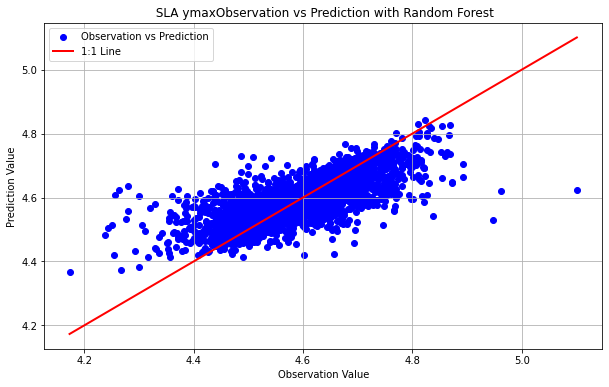

In [14]:
# Make predictions on the test set
predictions = rf_ymax.predict(sla_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_ymax_test_labels, predictions)
r2 = r2_score(sla_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_ymax_test_labels.max(), predictions.max())
min_val = min(sla_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA ymaxObservation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### SLA STD

In [15]:
# Feature: RAD_value, Importance: 0.07669097459397287
# Feature: slope_value, Importance: 0.07147340817878438
# Feature: PET_value, Importance: 0.0695510730645132
# Feature: snow_value, Importance: 0.06916390367825595
# Feature: SWI_value, Importance: 0.06507914927609261
# Feature: soil_carbon_value, Importance: 0.06443470952193259
# Feature: annual_precp_value, Importance: 0.06378510139442894
# Feature: AET_value, Importance: 0.052799799655079
# Feature: defict_value, Importance: 0.0517469991691046
# Feature: TWI_value, Importance: 0.04756707918480476
# Feature: voil_water_value, Importance: 0.044964460300978025
# Feature: soil_nitrogen_value, Importance: 0.042434910825127174
# Feature: soil_ph_value, Importance: 0.03767205805293766
# Feature: precp_warmest_value, Importance: 0.037225232132303665
# Feature: mean_temp_wettest_quarter_value, Importance: 0.03353666905547871
# Feature: mean_temp_driest_quarter_value, Importance: 0.032664476201901986
# Feature: mean_temp_coldest_quarter_value, Importance: 0.03199188236798751
# Feature: annual_diurnal_temp_value, Importance: 0.030510024235793007
# Feature: annual_mean_temp_value, Importance: 0.028833362634188144
# Feature: precp_coldest_value, Importance: 0.025053532679635893
# Feature: precp_seasonality_value, Importance: 0.01753295160303378
# Feature: isothremality_value, Importance: 0.005288242193665518

In [16]:
sla_std_labels = dataset['sla_std_mean_value']
sla_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value', 
                         'precp_seasonality_value', 'isothremality_value',
                        'precp_coldest_value',
                        'annual_mean_temp_value',
                        'annual_diurnal_temp_value',
                        'mean_temp_coldest_quarter_value',
                        'mean_temp_driest_quarter_value',
                        'soil_ph_value'
                                              
                        ], axis=1) # Features

In [17]:
sla_std_train_features, sla_std_test_features, sla_std_train_labels, sla_std_test_labels = train_test_split(
    sla_std_features, sla_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(sla_std_train_features, sla_std_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [18]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = sla_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: PET_value, Importance: 0.08963437165391619
Feature: annual_precp_value, Importance: 0.0895736118903103
Feature: RAD_value, Importance: 0.08873919594087144
Feature: SWI_value, Importance: 0.08666074284332399
Feature: slope_value, Importance: 0.08548087334872859
Feature: snow_value, Importance: 0.08202714747501957
Feature: soil_carbon_value, Importance: 0.07486065745210876
Feature: defict_value, Importance: 0.06372022349451846
Feature: AET_value, Importance: 0.06345083715618244
Feature: voil_water_value, Importance: 0.05641120076088229
Feature: precp_warmest_value, Importance: 0.05567063689148564
Feature: TWI_value, Importance: 0.05535860614150926
Feature: mean_temp_wettest_quarter_value, Importance: 0.05437391214682798
Feature: soil_nitrogen_value, Importance: 0.05403798280431516


In [19]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\sla_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])

Mean Squared Error: 0.002155664359583514
R-squared: 0.5461912464443446


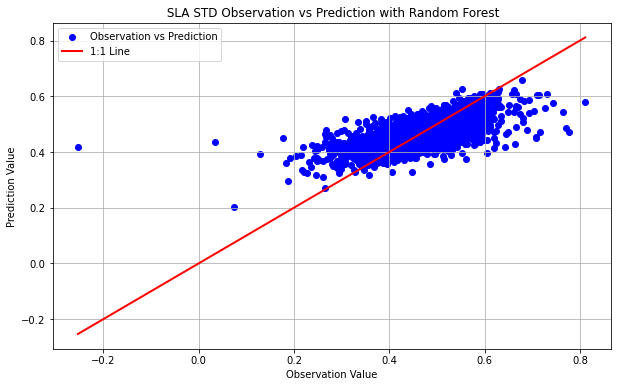

In [20]:
# Make predictions on the test set
predictions = rf_std.predict(sla_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(sla_std_test_labels, predictions)
r2 = r2_score(sla_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(sla_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(sla_std_test_labels.max(), predictions.max())
min_val = min(sla_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' SLA STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### LA YMAX

In [21]:
la_ymax_labels = dataset['la_ymax']
la_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',

                        'mean_temp_wettest_quarter_value', 
                        'annual_diurnal_temp_value', 
                        'precp_seasonality_value', 
                        'isothremality_value',
                        'precp_coldest_value',
                        'PET_value',
                        'annual_mean_temp_value',
                        'soil_nitrogen_value'
                        ], axis=1) # Features
la_ymax_train_features, la_ymax_test_features, la_ymax_train_labels, la_ymax_test_labels = train_test_split(
    la_ymax_features, la_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(la_ymax_train_features, la_ymax_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [22]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = la_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.08590766931461244
Feature: SWI_value, Importance: 0.08467496279007317
Feature: annual_precp_value, Importance: 0.08446810587772213
Feature: TWI_value, Importance: 0.08267144933777967
Feature: RAD_value, Importance: 0.07976905631080641
Feature: precp_warmest_value, Importance: 0.0751701978784653
Feature: voil_water_value, Importance: 0.07238497187015071
Feature: soil_carbon_value, Importance: 0.06771103750618356
Feature: snow_value, Importance: 0.06632898766110636
Feature: soil_ph_value, Importance: 0.06308266507362083
Feature: defict_value, Importance: 0.0627775209876913
Feature: mean_temp_driest_quarter_value, Importance: 0.062532863888805
Feature: AET_value, Importance: 0.05821846666392107
Feature: mean_temp_coldest_quarter_value, Importance: 0.054302044839062244


In [23]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\la_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])

Mean Squared Error: 0.4410184028621264
R-squared: 0.4750705635969279


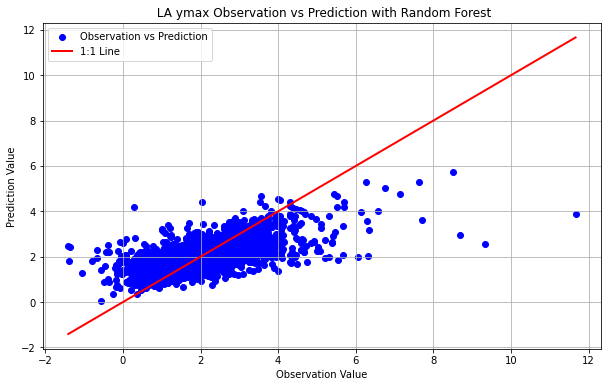

In [24]:
# Make predictions on the test set
predictions = rf_ymax.predict(la_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(la_ymax_test_labels, predictions)
r2 = r2_score(la_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(la_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(la_ymax_test_labels.max(), predictions.max())
min_val = min(la_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' LA ymax Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### LA STD

In [25]:
la_std_labels = dataset['la_std_value']
la_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                                
                         'mean_temp_coldest_quarter_value', 
                        'annual_mean_temp_value', 'isothremality_value',
                        'precp_seasonality_value',
                        'precp_coldest_value', 'PET_value', 'mean_temp_driest_quarter_value',
                        'mean_temp_wettest_quarter_value'], axis=1) # Features
la_std_train_features, la_std_test_features, la_std_train_labels, la_std_test_labels = train_test_split(
    la_std_features, la_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(la_std_train_features, la_std_train_labels)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [26]:
# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = la_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: annual_precp_value, Importance: 0.09815681146983712
Feature: slope_value, Importance: 0.09267966437891964
Feature: SWI_value, Importance: 0.07952978350863865
Feature: precp_warmest_value, Importance: 0.07800886086428664
Feature: snow_value, Importance: 0.07542679827509848
Feature: RAD_value, Importance: 0.07423616770838284
Feature: soil_carbon_value, Importance: 0.07310159049431192
Feature: TWI_value, Importance: 0.07176602143395962
Feature: annual_diurnal_temp_value, Importance: 0.06853303471964022
Feature: AET_value, Importance: 0.06600870527087546
Feature: soil_ph_value, Importance: 0.05959981628960029
Feature: defict_value, Importance: 0.05695513628174631
Feature: soil_nitrogen_value, Importance: 0.05498473252265737
Feature: voil_water_value, Importance: 0.05101287678204546


In [27]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\la_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])

Mean Squared Error: 0.08842542389021911
R-squared: 0.4410762405597696


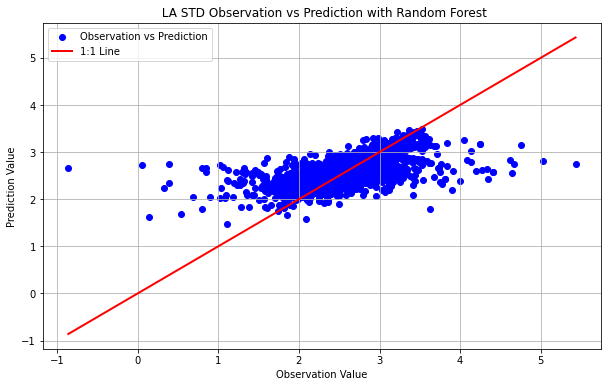

In [28]:
# Make predictions on the test set
predictions = rf_std.predict(la_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(la_std_test_labels, predictions)
r2 = r2_score(la_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(la_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(la_std_test_labels.max(), predictions.max())
min_val = min(la_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' LA STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### d13c ymax

In [29]:
d13c_ymax_labels = dataset['d13c_ymax_value']
d13c_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',

                         'annual_diurnal_temp_value',
                        'precp_coldest_value', 'isothremality_value',
                        'mean_temp_wettest_quarter_value',
                        'mean_temp_coldest_quarter_value',
                        'precp_seasonality_value',
                        'annual_mean_temp_value',
                        'precp_warmest_value'], axis=1) # Features
d13c_ymax_train_features, d13c_ymax_test_features, d13c_ymax_train_labels, d13c_ymax_test_labels = train_test_split(
    d13c_ymax_features, d13c_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(d13c_ymax_train_features, d13c_ymax_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = d13c_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.1279593988050254
Feature: soil_ph_value, Importance: 0.08684721942182297
Feature: SWI_value, Importance: 0.08191141965881117
Feature: soil_carbon_value, Importance: 0.08180484130365612
Feature: RAD_value, Importance: 0.07998190932592705
Feature: TWI_value, Importance: 0.07628462960429451
Feature: annual_precp_value, Importance: 0.06952153999085253
Feature: soil_nitrogen_value, Importance: 0.0655513815557659
Feature: snow_value, Importance: 0.06365582550994316
Feature: PET_value, Importance: 0.06138444084938372
Feature: defict_value, Importance: 0.051951845954750525
Feature: voil_water_value, Importance: 0.05156159680806329
Feature: mean_temp_driest_quarter_value, Importance: 0.05085311532438694
Feature: AET_value, Importance: 0.05073083588731656


In [30]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\d13c_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.13403748418900355
R-squared: 0.5421967859538933


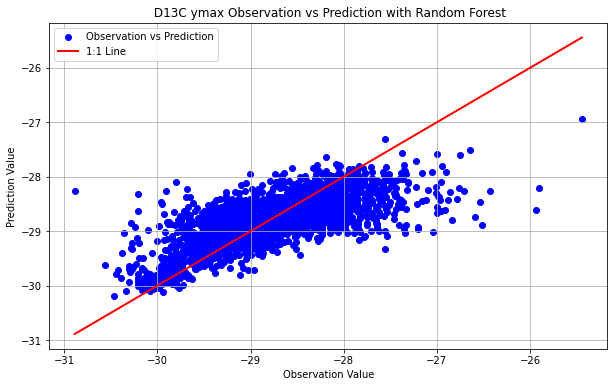

In [31]:
# Make predictions on the test set
predictions = rf_ymax.predict(d13c_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(d13c_ymax_test_labels, predictions)
r2 = r2_score(d13c_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(d13c_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(d13c_ymax_test_labels.max(), predictions.max())
min_val = min(d13c_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' D13C ymax Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### d13c std

In [32]:
d13c_std_labels = dataset['d13c_std_value']
d13c_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',

                        'precp_coldest_value', 
                        'annual_diurnal_temp_value',
                        'precp_seasonality_value', 
                        'isothremality_value',
                        'annual_mean_temp_value',
                        'mean_temp_coldest_quarter_value',
                        'mean_temp_driest_quarter_value',
                        'voil_water_value'], axis=1) # Features
d13c_std_train_features, d13c_std_test_features, d13c_std_train_labels, d13c_std_test_labels = train_test_split(
    d13c_std_features, d13c_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(d13c_std_train_features, d13c_std_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = d13c_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: RAD_value, Importance: 0.11759079263036941
Feature: slope_value, Importance: 0.10681850529209526
Feature: annual_precp_value, Importance: 0.08712175968732047
Feature: SWI_value, Importance: 0.07921257958287824
Feature: snow_value, Importance: 0.07074133846333658
Feature: soil_carbon_value, Importance: 0.06824459332024187
Feature: defict_value, Importance: 0.06462047909223217
Feature: TWI_value, Importance: 0.06431246056065298
Feature: PET_value, Importance: 0.06405176876409083
Feature: precp_warmest_value, Importance: 0.06277312257674814
Feature: AET_value, Importance: 0.05799352190744832
Feature: soil_ph_value, Importance: 0.05263625529665811
Feature: soil_nitrogen_value, Importance: 0.052635586438142964
Feature: mean_temp_wettest_quarter_value, Importance: 0.0512472363877847


In [33]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\d13c_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.03846795419329726
R-squared: 0.5061916278683245


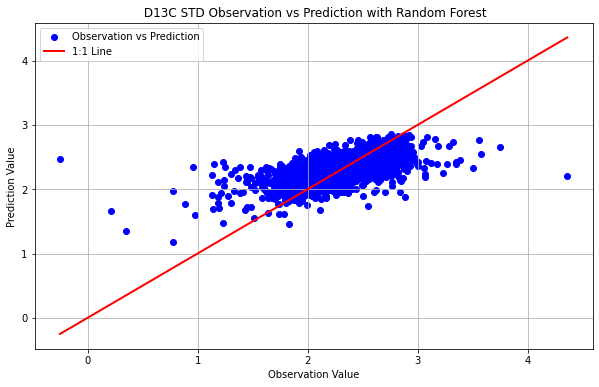

In [34]:
# Make predictions on the test set
predictions = rf_std.predict(d13c_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(d13c_std_test_labels, predictions)
r2 = r2_score(d13c_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(d13c_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(d13c_std_test_labels.max(), predictions.max())
min_val = min(d13c_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' D13C STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### d15n ymax

In [35]:
d15n_ymax_labels = dataset['d15n_ymax_value']
d15n_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',   
                        'precp_coldest_value',    
                        'PET_value',                                   
                        'mean_temp_wettest_quarter_value',
                        'precp_seasonality_value', 
                        'isothremality_value','mean_temp_coldest_quarter_value',
                        'annual_mean_temp_value', 'defict_value'], axis=1) # Features
d15n_ymax_train_features, d15n_ymax_test_features, d15n_ymax_train_labels, d15n_ymax_test_labels = train_test_split(
    d15n_ymax_features, d15n_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(d15n_ymax_train_features, d15n_ymax_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = d15n_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: RAD_value, Importance: 0.09685035565272146
Feature: slope_value, Importance: 0.0912750977738996
Feature: SWI_value, Importance: 0.08607437491080829
Feature: annual_precp_value, Importance: 0.08535353912643284
Feature: precp_warmest_value, Importance: 0.08083871660247917
Feature: TWI_value, Importance: 0.075258040979443
Feature: soil_ph_value, Importance: 0.07052873143579365
Feature: soil_nitrogen_value, Importance: 0.06690978705180387
Feature: soil_carbon_value, Importance: 0.06097904586002431
Feature: voil_water_value, Importance: 0.06082379753053787
Feature: snow_value, Importance: 0.05833088379650974
Feature: mean_temp_driest_quarter_value, Importance: 0.057555694381634846
Feature: annual_diurnal_temp_value, Importance: 0.05562356350600401
Feature: AET_value, Importance: 0.053598371391907366


In [36]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\d15n_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 1.5838671499925032
R-squared: 0.6143181158531412


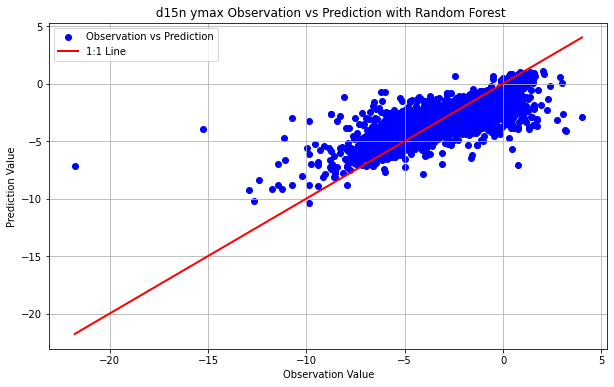

In [37]:
# Make predictions on the test set
predictions = rf_ymax.predict(d15n_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(d15n_ymax_test_labels, predictions)
r2 = r2_score(d15n_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(d15n_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(d15n_ymax_test_labels.max(), predictions.max())
min_val = min(d15n_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' d15n ymax Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### d15n std

In [38]:
d15n_std_labels = dataset['d15n_std_value']
d15n_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',

                        'mean_temp_coldest_quarter_value', 'annual_mean_temp_value',
                        'precp_seasonality_value', 'isothremality_value',
                        'precp_coldest_value', 'mean_temp_driest_quarter_value','PET_value',
                        'annual_diurnal_temp_value'], axis=1) # Features
d15n_std_train_features, d15n_std_test_features, d15n_std_train_labels, d15n_std_test_labels = train_test_split(
    d15n_std_features, d15n_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(d15n_std_train_features, d15n_std_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = d15n_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.09261046861268762
Feature: annual_precp_value, Importance: 0.08976464711165276
Feature: RAD_value, Importance: 0.08529613266207094
Feature: TWI_value, Importance: 0.08386424108194936
Feature: SWI_value, Importance: 0.07492638988564612
Feature: precp_warmest_value, Importance: 0.07184038288219056
Feature: soil_carbon_value, Importance: 0.07021547974510159
Feature: AET_value, Importance: 0.06644313527019093
Feature: snow_value, Importance: 0.06555894236900926
Feature: defict_value, Importance: 0.06478808782563465
Feature: soil_nitrogen_value, Importance: 0.05976263629529426
Feature: soil_ph_value, Importance: 0.05950357571472549
Feature: voil_water_value, Importance: 0.059403323419368166
Feature: mean_temp_wettest_quarter_value, Importance: 0.056022557124478435


In [39]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\d15n_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.2612460466746233
R-squared: 0.4115414315848498


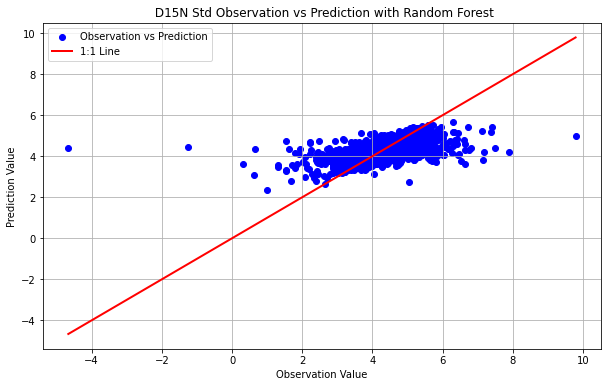

In [40]:
# Make predictions on the test set
predictions = rf_std.predict(d15n_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(d15n_std_test_labels, predictions)
r2 = r2_score(d15n_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(d15n_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(d15n_std_test_labels.max(), predictions.max())
min_val = min(d15n_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' D15N Std Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### LDMC YMAX

In [41]:
ldmc_ymax_labels = dataset['ldmc_ymax_value']
ldmc_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',                       
                        'AET_value','PET_value',
                        'voil_water_value',            
                        'mean_temp_coldest_quarter_value', 
                        'annual_mean_temp_value',
                        'mean_temp_wettest_quarter_value', 
                        'precp_seasonality_value', 'isothremality_value'  ], axis=1) # Features
ldmc_ymax_train_features, ldmc_ymax_test_features, ldmc_ymax_train_labels, ldmc_ymax_test_labels = train_test_split(
    ldmc_ymax_features, ldmc_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(ldmc_ymax_train_features, ldmc_ymax_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = ldmc_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: annual_precp_value, Importance: 0.10903929184697336
Feature: precp_warmest_value, Importance: 0.09777926337312089
Feature: annual_diurnal_temp_value, Importance: 0.08293112278312766
Feature: SWI_value, Importance: 0.08139378453131095
Feature: RAD_value, Importance: 0.07410744323177551
Feature: soil_nitrogen_value, Importance: 0.07208428919081072
Feature: slope_value, Importance: 0.07184792419166874
Feature: TWI_value, Importance: 0.07047926281781305
Feature: precp_coldest_value, Importance: 0.06298966290392778
Feature: soil_ph_value, Importance: 0.05924900887017302
Feature: soil_carbon_value, Importance: 0.056259937332941067
Feature: mean_temp_driest_quarter_value, Importance: 0.05622859962535618
Feature: snow_value, Importance: 0.05411604708120626
Feature: defict_value, Importance: 0.05149436221979471


In [42]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\ldmc_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.14534638972236194
R-squared: 0.6829670194027533


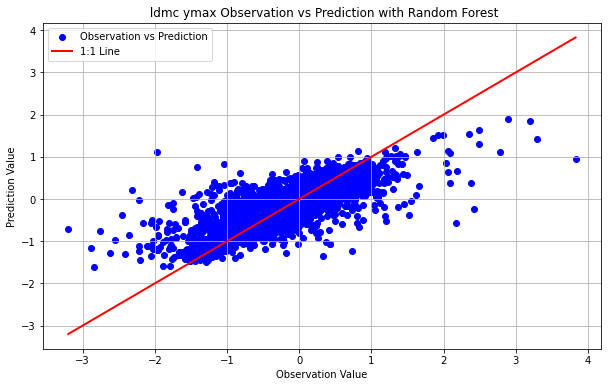

In [43]:
# Make predictions on the test set
predictions = rf_ymax.predict(ldmc_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(ldmc_ymax_test_labels, predictions)
r2 = r2_score(ldmc_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ldmc_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(ldmc_ymax_test_labels.max(), predictions.max())
min_val = min(ldmc_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' ldmc ymax Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### ldmc std

In [44]:
ldmc_std_labels = dataset['ldmc_std_value']
ldmc_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                        'mean_temp_coldest_quarter_value',             
                        'annual_mean_temp_value', 'mean_temp_wettest_quarter_value',
                        'precp_seasonality_value', 'isothremality_value',
                        'precp_coldest_value',
                        'annual_diurnal_temp_value'], axis=1) # Features
ldmc_std_train_features, ldmc_std_test_features, ldmc_std_train_labels, ldmc_std_test_labels = train_test_split(
    ldmc_std_features, ldmc_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(ldmc_std_train_features, ldmc_std_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = ldmc_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: slope_value, Importance: 0.10924006670651083
Feature: SWI_value, Importance: 0.08970243250929769
Feature: RAD_value, Importance: 0.07647913444603881
Feature: soil_carbon_value, Importance: 0.07536477002117793
Feature: soil_ph_value, Importance: 0.07281668337767155
Feature: soil_nitrogen_value, Importance: 0.06840943695416934
Feature: voil_water_value, Importance: 0.06277227059932074
Feature: snow_value, Importance: 0.06098142496722812
Feature: TWI_value, Importance: 0.05822118831354809
Feature: annual_precp_value, Importance: 0.05779207528433233
Feature: defict_value, Importance: 0.05693920215469007
Feature: AET_value, Importance: 0.05386074251647918
Feature: PET_value, Importance: 0.05376453717624497
Feature: precp_warmest_value, Importance: 0.05200166139984617
Feature: mean_temp_driest_quarter_value, Importance: 0.051654373573444


In [45]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\ldmc_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.009265102976204649
R-squared: 0.5465207038064555


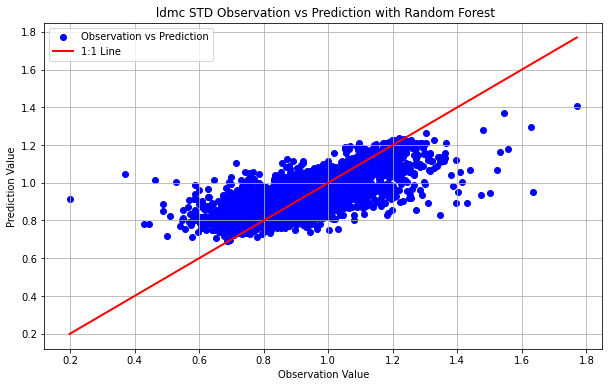

In [46]:
# Make predictions on the test set
predictions = rf_std.predict(ldmc_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(ldmc_std_test_labels, predictions)
r2 = r2_score(ldmc_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ldmc_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(ldmc_std_test_labels.max(), predictions.max())
min_val = min(ldmc_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' ldmc STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### pc ymax

In [47]:
pc_ymax_labels = dataset['pc_ymax_value']
pc_ymax_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                        'mean_temp_coldest_quarter_value',
                        'PET_value',  'mean_temp_driest_quarter_value', 
                        'mean_temp_wettest_quarter_value', 'precp_coldest_value', 'annual_mean_temp_value', 
                        'precp_seasonality_value', 'isothremality_value' ], axis=1) # Features
pc_ymax_train_features, pc_ymax_test_features, pc_ymax_train_labels, pc_ymax_test_labels = train_test_split(
    pc_ymax_features, pc_ymax_labels, test_size = 0.25, random_state = 42)


rf_ymax = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_ymax.fit(pc_ymax_train_features, pc_ymax_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_ymax.feature_importances_

# Get the names of the features
feature_names = pc_ymax_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: annual_precp_value, Importance: 0.09080577989475291
Feature: SWI_value, Importance: 0.08787326608950051
Feature: slope_value, Importance: 0.078641400034164
Feature: TWI_value, Importance: 0.07634555578696428
Feature: snow_value, Importance: 0.07594494860181648
Feature: RAD_value, Importance: 0.07555068025070205
Feature: precp_warmest_value, Importance: 0.07026306694483549
Feature: soil_carbon_value, Importance: 0.06931098768574927
Feature: soil_ph_value, Importance: 0.06663233435663224
Feature: AET_value, Importance: 0.06595359496956775
Feature: defict_value, Importance: 0.06457593197589499
Feature: annual_diurnal_temp_value, Importance: 0.061801440741439964
Feature: soil_nitrogen_value, Importance: 0.06170314950962975
Feature: voil_water_value, Importance: 0.05459786315835039


In [48]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\pc_ymax.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.0004354425355804816
R-squared: 0.40067847069793316


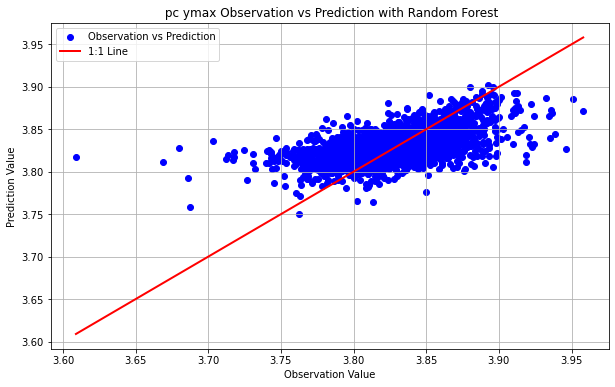

In [49]:
# Make predictions on the test set
predictions = rf_ymax.predict(pc_ymax_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(pc_ymax_test_labels, predictions)
r2 = r2_score(pc_ymax_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(pc_ymax_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(pc_ymax_test_labels.max(), predictions.max())
min_val = min(pc_ymax_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' pc ymax Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

### PC STD

In [50]:
pc_std_labels = dataset['pc_std_value']
pc_std_features = dataset.drop(['la_ymax','la_std_value', 
                         'sla_ymax_value','sla_std_mean_value',
                         'd13c_ymax_value', 'd13c_std_value', 
                         'd15n_ymax_value', 'd15n_std_value',
                        'ldmc_ymax_value', 'ldmc_std_value',
                        'pc_ymax_value', 'pc_std_value',
                         'PET_value', 'mean_temp_driest_quarter_value', 
                        'mean_temp_wettest_quarter_value',  
                        'precp_coldest_value',
                        'annual_mean_temp_value', 'precp_seasonality_value', 'isothremality_value', 'mean_temp_coldest_quarter_value'  ], axis=1) # Features
pc_std_train_features, pc_std_test_features, pc_std_train_labels, pc_std_test_labels = train_test_split(
    pc_std_features, pc_std_labels, test_size = 0.25, random_state = 42)


rf_std = RandomForestRegressor(**best_params)
# Train the Random Forest model with the best parameters
rf_std.fit(pc_std_train_features, pc_std_train_labels)



# Assuming rf_ymax is your trained Random Forest model
feature_importances = rf_std.feature_importances_

# Get the names of the features
feature_names = pc_std_features.columns

# Combine feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or inspect the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: annual_precp_value, Importance: 0.1020345770645811
Feature: precp_warmest_value, Importance: 0.08768333373442531
Feature: slope_value, Importance: 0.08548520503825663
Feature: SWI_value, Importance: 0.08098636614741536
Feature: annual_diurnal_temp_value, Importance: 0.07727359034594942
Feature: RAD_value, Importance: 0.07276982522366228
Feature: TWI_value, Importance: 0.06981175779249142
Feature: soil_carbon_value, Importance: 0.06906511618562698
Feature: snow_value, Importance: 0.0681779744902405
Feature: AET_value, Importance: 0.06452663236411128
Feature: soil_ph_value, Importance: 0.06077380270865118
Feature: soil_nitrogen_value, Importance: 0.055466932904450934
Feature: defict_value, Importance: 0.05533008298142378
Feature: voil_water_value, Importance: 0.05061480301871379


In [51]:
import csv

# Assuming the rest of your code is above and has been executed to define sorted_feature_importance

# Now, write the sorted feature importances to a CSV file
with open('E:\wenqu\environmental_factors\Barplot_csv\pc_std.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header
    writer.writerow(['Feature', 'Importance'])
    
    # Iterate over the sorted feature importance and write each to the file
    for feature, importance in sorted_feature_importance:
        writer.writerow([feature, importance])


Mean Squared Error: 0.0002550352589797626
R-squared: 0.479766959125984


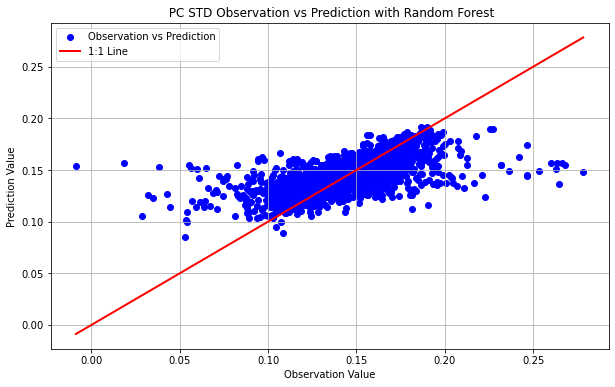

In [52]:
# Make predictions on the test set
predictions = rf_std.predict(pc_std_test_features)
# Calculate mean squared error and R-squared
mse = mean_squared_error(pc_std_test_labels, predictions)
r2 = r2_score(pc_std_test_labels, predictions)
print('Mean Squared Error:', mse)
print('R-squared:', r2)
# Plot the observation values against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(pc_std_test_labels, predictions, color='blue', label='Observation vs Prediction')
# Plot the trend line (perfect predictions)
max_val = max(pc_std_test_labels.max(), predictions.max())
min_val = min(pc_std_test_labels.min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='1:1 Line')
# Add labels, title, and legend
plt.title(' PC STD Observation vs Prediction with Random Forest')
plt.xlabel('Observation Value')
plt.ylabel('Prediction Value')
plt.legend()
# Show plot
plt.grid()
plt.show()

In [ ]:
Dropping 'annual_precp_value' with VIF=88843.14
Dropping 'mean_temp_coldest_quarter_value' with VIF=42349.80
Dropping 'annual_diurnal_temp_value' with VIF=10744 .76
Dropping 'SWI_value' with VIF=4002.57
Dropping 'precp_warmest_value' with VIF=3610.75
Dropping 'precp_seasonality_value' with VIF=2200.74
Dropping 'isothremality_value' with VIF=2146.94
Dropping 'voil_water_value' with VIF=809.40
Dropping 'snow_value' with VIF=555.11
Dropping 'mean_temp_driest_quarter_value' with VIF=349.86
Dropping 'soil_nitrogen_value' with VIF=249.23
Dropping 'mean_temp_wettest_quarter_value' with VIF=113.35
Dropping 'soil_ph_value' with VIF=68.60
Dropping 'soil_carbon_value' with VIF=37.00
Dropping 'precp_coldest_value' with VIF=24.90